In [ ]:
from importlib import reload

import numpy as np
from matplotlib import pyplot as plt

import L96
import relax_punch

reload(L96)
reload(relax_punch)

ndarray = np.ndarray

# Run gradient descent starting with correct parameters

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
Δt = 10
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = np.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

rp = relax_punch.RelaxPunch(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)

# Initial true state
init = np.random.default_rng(42).uniform(size=I + I * J)
U0 = init[:I]
V0 = init[I:]

# Initial simulation state
U0_sim = np.zeros_like(U0)
V0_sim = np.zeros_like(V0)

num_iters = 50
learning_rate = 10

rp.iterate(Δt, num_iters, learning_rate, U0, V0, U0_sim, V0_sim)

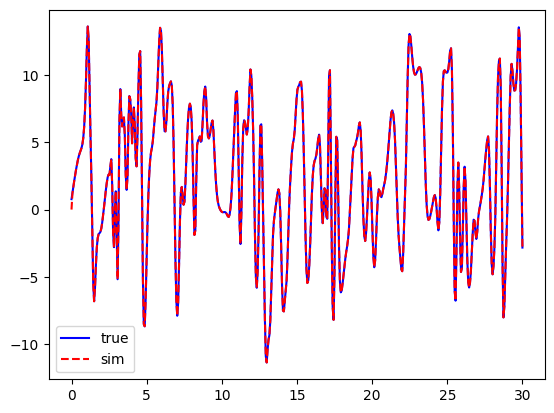

In [ ]:
tn = 500
tls = np.linspace(0, 30, tn)

states = rp.sol(tls)
Us, Vs = zip(*(L96.apart(state, I, J) for state in states.T))
Us, Vs = np.stack(Us), np.stack(Vs)

states_sim = rp.sim(tls)
Us_sim, Vs_sim = zip(*(L96.apart(state, I, J_sim) for state in states_sim.T))
Us_sim, Vs_sim = np.stack(Us_sim), np.stack(Vs_sim)

fig, ax = plt.subplots(1, 1)

ax.plot(tls, Us.T[0], label="true", color="blue")
ax.plot(tls, Us_sim.T[0], label="sim", color="red", linestyle="--")

ax.legend()
plt.show()

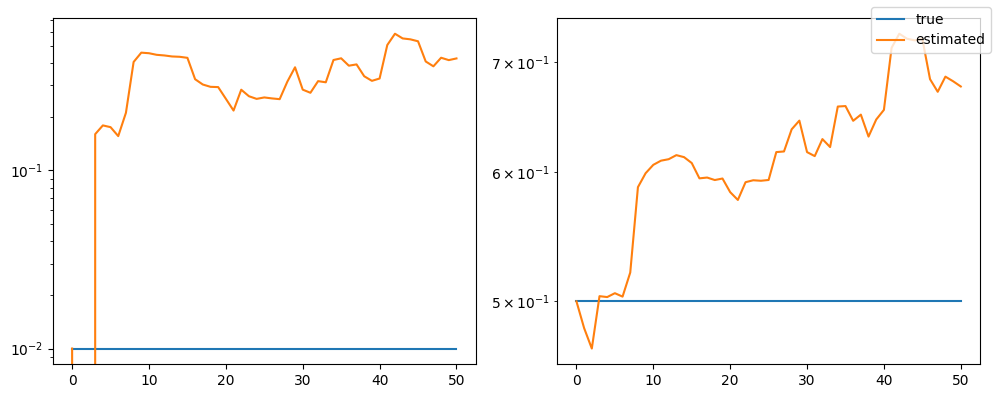

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
ax.plot(np.full_like(rp.c1s, γ1), label="true")
ax.plot(rp.c1s, label="estimated")
ax.semilogy()

ax = axs[1]
ax.plot(np.full_like(rp.c2s, γ2))
ax.plot(rp.c2s)
ax.semilogy()

fig.tight_layout()
fig.legend()
plt.show()

# Try updating parameters

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
Δt = 10
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1 / 2, γ2 / 2
ds = np.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

rp = relax_punch.RelaxPunch(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)

# Initial true state
init = np.random.default_rng(42).uniform(size=I + I * J)
U0 = init[:I]
V0 = init[I:]

# Initial simulation state
U0_sim = np.zeros_like(U0)
V0_sim = np.zeros_like(V0)

num_iters = 100
learning_rate = 10

rp.iterate(Δt, num_iters, learning_rate, U0, V0, U0_sim, V0_sim)

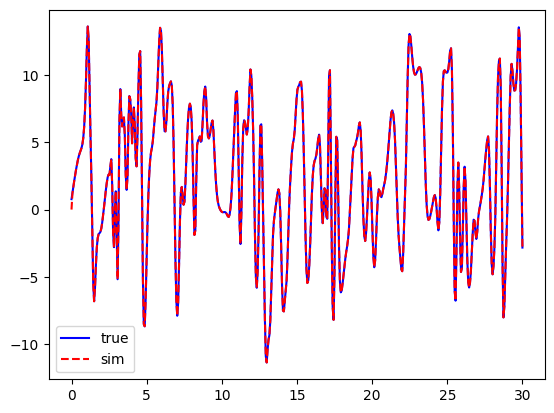

In [ ]:
tn = 500
# tls = np.linspace(0, Δt * num_iters, tn)
tls = np.linspace(0, 30, tn)

states = rp.sol(tls)
Us, Vs = zip(*(L96.apart(state, I, J) for state in states.T))
Us, Vs = np.stack(Us), np.stack(Vs)

states_sim = rp.sim(tls)
Us_sim, Vs_sim = zip(*(L96.apart(state, I, J_sim) for state in states_sim.T))
Us_sim, Vs_sim = np.stack(Us_sim), np.stack(Vs_sim)

fig, ax = plt.subplots(1, 1)

ax.plot(tls, Us.T[0], label="true", color="blue")
ax.plot(tls, Us_sim.T[0], label="sim", color="red", linestyle="--")

ax.legend()
plt.show()

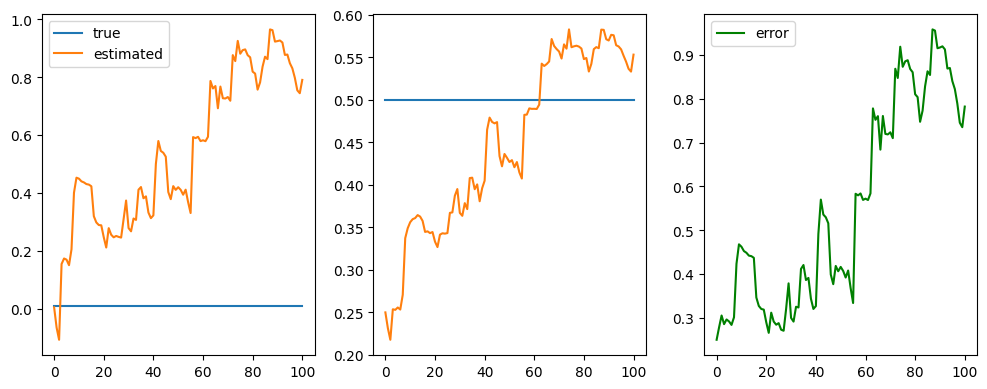

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

ax = axs[0]
ax.plot(np.full_like(rp.c1s, γ1), label="true")
ax.plot(rp.c1s, label="estimated")
ax.legend()

ax = axs[1]
ax.plot(np.full_like(rp.c2s, γ2))
ax.plot(rp.c2s)

ax = axs[2]
diff = np.stack((rp.c1s, rp.c2s)) - np.array((γ1, γ2)).reshape((-1, 1))
ax.plot(np.linalg.norm(diff, axis=0), label="error", color="green")
ax.legend()

fig.tight_layout()
plt.show()